# Items

This notebook contains examples of using the ArcGIS API for Python to manage items in an ArcGIS Online portal. It assumes you are relatively familiar with Python generally, and with performing ArcGIS Online organization administration tasks through the portal web app. It does not assume any familiarity with the specifics of how to use the Python API to automate those administrative tasks.

## Table of Contents

* [Notebook Environment](#notebook-environment)
* [Create `Item` objects](#create-item-objects)
    * [Get a specific item](#get-a-specific-item)
    * [Search for items](#search-for-items)
        * [Default query](#default-query)
        * [Query a specific field](#query-a-specific-field)
        * [Query multi-word phrases](#query-multi-word-phrases)
        * [Query by range of values](#query-by-range-of-values)
        * [Combine query terms](#combining-query-terms)
        * [Advanced search](#advanced-search)
* [Get information about an item](#get-information-about-an-item)
    * [Display item information](#display-item-information)
    * [Access item properties](#access-item-properties)
* [Manage items](#manage-items)
    * [Create an item](#create-an-item)
    * [Copy an item](#copy-an-item)
    * [Update an item's information](#update-an-items-information)
    * [Update multiple items' information](#update-multiple-items-information)
    * [Reassign an item to a new owner](#reassign-an-item-to-a-new-owner)
    * [Reassign multiple items to a single new owner](#reassign-multiple-items-to-single-new-owner)
    * [Share a single item](#share-a-single-item)
        * [Change the sharing level](#change-the-sharing-level)
        * [Sharing items to groups: as documented](#sharing-items-to-groups-as-documented)
        * [Sharing items to groups: the undocumented complexity](#sharing-items-to-groups-the-undocumented-complexity)
    * [Share multiple items](#share-multiple-items)
    * [Move an item between folders](#move-an-item-between-folders)
    * [Export an item](#export-an-item)
    * [Delete an item](#delete-an-item)
    * [Delete multiple items](#delete-multiple-items)

## Notebook Environment

The code in this notebook is specific to version 2.2 of the Python API. All API references in are from the [arcgis.gis](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html) and [arcgis.features](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html) modules: [ContentManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager), [FeatureLayerCollection](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayercollection), [FeatureLayerCollectionManager](https://developers.arcgis.com/python/api-reference/arcgis.features.managers.html#featurelayercollectionmanager), [GIS](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis), [Group](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#group), [GroupManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#groupmanager), [Item](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item), [User](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#user) and [UserManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager)

The code below imports the relevant portions of the `arcgis` package, confirms you are using the correct version, and creates a `GIS` object called `gis` that connects you to your ArcGIS Online portal. The variables in this cell are required for subsequent cells to work, but the cells in this notebook are otherwise independent of each other. 

You will need to alter the code creating the `GIS` object to make a connection to your portal. Various methods of creating this object are covered in the [Portal connection notebook](https://github.com/travisormsby/agol_admin/blob/main/portal_connection.ipynb). Usernames and specific content details (such as item id) used in this notebook are also specific to my organization. You will need to change them to something appropriate for your organization.

In [908]:
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayerCollection

assert arcgis.__version__.startswith("2.2.")
gis = GIS(profile="agol") # Change to make a connection to your portal


## Create `Item` objects

In order to manage items, you will need to represent them as some data structure that Python can manipulate. An instance of the [`ContentManager` class](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager) can create these `Item` objects. This instance is available as the `content` property of a [`GIS` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis)

### Get a specific item

The code below uses the [`get` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.get) to return a single `Item` object that matches the provided item id. 

In [906]:
item = gis.content.get("63d41db9006647afb92516cee5c89a1a")
print(item)

<Item title:"HOLC" type:Web Map owner:t.ormsby>


### Search for items

The [`search` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.search) returns a list of `Item` objects that match the search criteria. There are several parameters for the `search` method, most of which are well explained in the documentation. 

The most important parameter is `query`, which is used to search for items by fields not covered by the other parameters. The `query` parameter is also used for complex search logic using ranges, boolean operators, and grouping.

The use of the `query` parameter is unfortunately not well documented. Esri provides [examples of POST requests](https://developers.arcgis.com/rest/users-groups-and-items/search-reference.htm) made against the REST API directly, but these do not translate perfectly to the Python syntax of the `search` method. The examples below show how to correctly format query strings.

#### Default query

By default, the `query` argument is matched against items' title, tags, snippet, description, type, and typekeywords fields. The `query` argument is not case sensitive and will return close matches, not just exact matches. 

The code below will return up to 20 items that match the term `"holc"` in any of the default fields.

In [442]:
items = gis.content.search(query="holc", max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Travis Ormsby" type:Web Mapping Application owner:t.ormsby>
<Item title:"HOLC" type:Web Map owner:t.ormsby>
<Item title:"Highest income" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>
<Item title:"Lowest income" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC Travis Ormsby" type:Web Map owner:t.ormsby>
<Item title:"Highest percent white population" type:Feature Layer Collection owner:t.ormsby>
<Item title:"Highest percent population of color" type:Feature Layer Collection owner:t.ormsby>


#### Query a specific field

You can specify a particular field in the query, instead of using the default fields. Querying does not work on all fields, but you can specify the following:

* `id` (item ID)
* `owner` (owner username)
* `created` (Unix miliseconds timestamp)
* `modified` (Unix miliseconds timestamp)
* `lastviewed` (Unix miliseconds timestamp)
* `title`
* `type` ([tables of all types](https://developers.arcgis.com/rest/users-groups-and-items/items-and-item-types.htm))
* `typekeywords` ([tables of all type keywords](https://developers.arcgis.com/rest/users-groups-and-items/items-and-item-types.htm))
* `description`
* `tags`
* `snippet` (summary text)
* `accessInformation`
* `access` (public, private, org, or shared)
* `group` (group ID)
* `numviews` (number of views)
* `numratings` (number of ratings)
* `numcomments` (number of comments)
* `avgrating` (average rating)
* `culture` (locale information, e.g. "en-US")
* `orgid` (returns items within a specified organization)
* `categories`
* `contentStatus` (null, deprecated, org_authoritative, public_authoritative)
* `name` (does not work for finding notebooks)
* `protected` (True or False)


The code below narrows the search above by limiting the search to the snippet field.





In [443]:
items = gis.content.search(query="snippet:holc", max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>


#### Query multi-word phrases

Querying items that match a multi-word phrase can be tricky. The code below is a naïve implementation of a search for the "HOLC Appraisals" item listed above. This implementation returns additional results that do not match the desired phrase

In [444]:
items = gis.content.search(query="title:HOLC Appraisals", max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>


The code below uses single quotes in an attempt to represent a phrase. This also does not work.

In [445]:
items = gis.content.search(query="title:'HOLC Appraisals'", max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>
<Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>


To find content that matches the entire phrase, the phrase must be enclosed in double quotes. The code below uses double quotes around the search phrase and returns the correct result.

In [446]:
items = gis.content.search(query='title:"HOLC Appraisals"', max_items=20)
for item in items:
    print(item)

<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>


#### Query by range of values

 Values can be queried by range using `firstValue TO lastValue` (`TO` must be capitalized). Brackets (`[]`) around the range indicate that the search should be inclusive of the values. Curly braces (`{}`) indicate that the search should be exclusive of the values.

This is especially useful for numeric values, but can work for any field.

The code below searches for items created during the month of October in US Central Time. The range opens with a bracket because it must be inclusive of the first milisecond of October. It closes with a curly brace because it must be exclusive of the first milisecond of November.


In [447]:
items = gis.content.search(query="created:[1696136400000 TO 1698814800000}", max_items=20)
for item in items:
    print(item)

<Item title:"ProblemsSummary" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ProblemsHeatMap" type:Feature Layer Collection owner:t.ormsby>
<Item title:"Collaboration" type:Notebook owner:t.ormsby>
<Item title:"Schools20MinWalk" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ProblemsVectorTilePackage" type:Vector Tile Package owner:t.ormsby>
<Item title:"ProblemsClusters" type:Service Definition owner:t.ormsby>
<Item title:"ProblemsHeatMap" type:Service Definition owner:t.ormsby>
<Item title:"SchoolsInfoFeatures" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ProblemsBins" type:Service Definition owner:t.ormsby>
<Item title:"ProblemsBins" type:Feature Layer Collection owner:t.ormsby>
<Item title:"SchoolsInfoBuffer" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ProblemsVectorTilePackage" type:Vector Tile Layer owner:t.ormsby>
<Item title:"ProblemsSummary" type:Service Definition owner:t.ormsby>
<Item title:"ProblemsClusters" type:Feature 

#### Combining query terms

[The REST API documentation](https://developers.arcgis.com/rest/users-groups-and-items/search-reference.htm#ESRI_SECTION1_5C6C35DB9E4A4F4492C5B937BDA2BF67) claims that you can use the Boolean operators `AND`, `OR` and `NOT` to combine terms in the query string. In practice, these Boolean operators do not work reliably, likely due to a bug in the ArcGIS API for Python. 

For that reason, the code below uses Python sets and set methods to return collections of items that match more complex patterns needing Boolean operators.



In [479]:
# Dictionary of two sets of Item objects, each set returned from a different query
itemsets = {
    "query 1": set(gis.content.search(query='"highest percent"', max_items=100)),
    "query 2": set(gis.content.search(query='"example"', max_items=100))
}

query1 = itemsets["query 1"]
query2 = itemsets["query 2"]

# Add more sets to the dictionary representing the intersection, union, and difference of the original sets
itemsets["query1 AND query2"] = query1.intersection(query2) # AND means the intersection of two sets
itemsets["query1 OR query 2"] = query1.union(query2) # OR means the union of two sets
itemsets["query1 NOT query 2"] = query1.difference(query2) # NOT means the difference of two sets

# Output the items in each set
for setname, itemset in itemsets.items():
    print(f"{setname} returns:")
    for item in itemset:
        print(item)
    

query 1 returns:
<Item title:"Highest percent population of color" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent white population" type:Feature Layer Collection owner:t.ormsby>
query 2 returns:
<Item title:"ExampleMap2" type:Web Map owner:ormsby_guest1>
<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
<Item title:"ExampleMap3" type:Web Map owner:ormsby_guest1>
query1 AND query2 returns:
<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
query1 OR query 2 returns:
<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
<Item title:"ExampleMap2" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent white population" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ExampleMap3" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent population of color" type:Feature Layer Collection owner:t.ormsby>
query1 NOT query 2 returns:
<Item title:"Highest perce

Putting the sets of `Item` objects in a dictionary as above is done to show you the relationships betwen the different sets. In practice, you would not usually do that. The code below represents a more typical pattern by creating variables to hold the results of the initial query terms, and then performing the set operation on those results

In [478]:
query1 = set(gis.content.search(query='"highest percent"', max_items=100))
query2 = set(gis.content.search(query='"example"', max_items=100))
query1OR2 = query1.union(query2)
for item in query1OR2:
    print(item)

<Item title:"ExampleMap1" type:Web Map owner:ormsby_guest1>
<Item title:"ExampleMap2" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent white population" type:Feature Layer Collection owner:t.ormsby>
<Item title:"ExampleMap3" type:Web Map owner:ormsby_guest1>
<Item title:"Highest percent population of color" type:Feature Layer Collection owner:t.ormsby>


#### Advanced search

The [`advanced_search` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.advanced_search) is very similar to the `search` method, with three important differences.

* The `advanced_search` method exposes some additional parameters to refine your search. These additional parameters are well documented in the API reference.

* The `search` method defaults to searching only inside the organization, but can search outside. The `advanced_search` method does not have a parameter to search inside the organization only (though similar results could be achieved with a query string)

* The `search` method returns a list of `Item` objects. By default, the `advanced_search` method retuns a dictionary with a list of `Item` objects stored in the `results` key. 



In [482]:
# The search method looks only inside the organization by default 
# It returns a list of Item objects
gis.content.search(query="snippet:holc")

[<Item title:"HOLC Appraisals" type:Feature Layer Collection owner:t.ormsby>,
 <Item title:"HOLC_Blocks" type:Service Definition owner:t.ormsby>,
 <Item title:"HOLC_Blocks" type:Feature Layer Collection owner:t.ormsby>]

In [490]:
# The advanced_search method searches all of ArcGIS Online 
# It returns a dictionary with Item objects stored in the results key
gis.content.advanced_search(query="snippet:holc")

{'total': 761,
 'start': 1,
 'num': 100,
 'nextStart': 101,
 'results': [<Item title:" (HOLC) Neighborhood Redlining Grade Boston" type:Web Map owner:raechelw>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:ElainnaH>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:jpszitta_DurhamEM>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:dpisut_content>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:Sarah_A_Knight>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands" type:Web Map owner:Connected_DMV_Atlas>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands – Dallas" type:Web Mapping Application owner:ldl8244>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands-Copy" type:Web Map owner:jeremyhoffman>,
  <Item title:"“Redlining” and Exposure to Urban Heat Islands-Copy" type:Web Map owner:noir0315_gisucla>,
  <Item title:"“

## Get information about an item

Once you have an `Item` object, you can access information about that item.

### Display item information

The code below uses the Jupyter Notebook `display` function to show a card for an item, including a link to its item details page.


<Item title:"ExampleMap3" type:Web Map owner:ormsby_guest1>
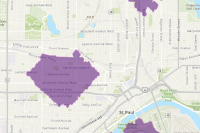

In [491]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
display(item)

### Access item properties

You can also access specific properties of an `Item` object. The code below prints some example information you can access. The [REST API documentation for items](https://developers.arcgis.com/rest/users-groups-and-items/item.htm) has the complete list of available properties.

In [963]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
print(item.shared_with)
print(item.can_delete)
print(item.owner)
print(item.modified)
print(item.ownerFolder)

{'everyone': True, 'org': True, 'groups': []}
True
t.ormsby
1697984440000
None


Most objects in Python have a `__dict__` property that shows all the object's properties. The code below leverages the `__dict__` property to represent the `Item` object as a Python dictionary.

In [693]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
item.__dict__

{'_portal': <arcgis.gis._impl._portalpy.Portal at 0x7f2a12d9f7c0>,
 '_gis': GIS @ https://ormsby.maps.arcgis.com version:2023.3,
 'itemid': '86f92739855e481c82d54c6dc167ef99',
 'thumbnail': 'thumbnail/ago_downloaded.png',
 '_workdir': '/tmp',
 '_hydrated': False,
 'id': '86f92739855e481c82d54c6dc167ef99',
 'owner': 't.ormsby',
 'created': 1697984440000,
 'isOrgItem': True,
 'modified': 1697984440000,
 'guid': None,
 'name': None,
 'title': 'ExampleMap3',
 'type': 'Web Map',
 'typeKeywords': ['ArcGIS API for JavaScript',
  'ArcGIS Online',
  'Explorer Web Map',
  'Map',
  'Online Map',
  'Web Map'],
 'description': None,
 'tags': [],
 'snippet': None,
 'documentation': None,
 'extent': [[-93.17136264567833, 44.889371356000396],
  [-93.05325961833472, 45.035733226307485]],
 'categories': [],
 'spatialReference': None,
 'accessInformation': None,
 'classification': None,
 'licenseInfo': None,
 'culture': 'en-us',
 'properties': None,
 'advancedSettings': None,
 'url': None,
 'proxyFilter'

## Manage items

### Create an item


The [`add` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.add) is equivalent to using the "New item" button in the portal web app and choosing the option to add the item without publishing a corresponding service.

The code below uses the `add` method to create a map image layer referencing an existing published service on a publicly-available ArcGIS Server site.

In [716]:
service_url = "https://pca-gis02.pca.state.mn.us/arcgis/rest/services/WIMN/sites/MapServer"

item_dict = {
    "type": "Map Service",
    "title": "What's In My Neighborhood Sites",
    "tags": ["Minnesota", "Pollution"],
    "snippet": "Locations of potentially contaminated sites",
    "access": "org",
    "url": service_url, # Required for items that reference a service
    "accessInformation": "Minnesota Pollution Control Agency" # Credits (Attribution)
}
gis.content.add(item_properties=item_dict, data=service_url)

<Item title:"What's In My Neighborhood Sites" type:Map Image Layer owner:t.ormsby>

The code below uses the `add` method to upload a file geodatabase and create a file geodatabase item in the portal. This requires a dictionary of properties for the item.

The code below then uses the [`publish` method of that `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.publish) to create a hosted feature layer item published from the data in that file geodatabase item. This requires a separate dictionary of parameters for the associated service.

Documentation for formatting the `publish_parameters` dictionary can be found with the [REST API reference for the /publish endpoint](https://developers.arcgis.com/rest/users-groups-and-items/publish-item.htm). Different items (CSV, shapefile, file geodatabase, etc) have different requirements for that dictionary. 

Notice that while the published feature service can have its own name and description, the hosted feature layer item that references that service inherits its item properties from the item it was published from.

In [835]:
# Path to original file geodatabase
fgdb = "https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_pca/env_my_neighborhood/fgdb_env_my_neighborhood.zip"

# File geodatabase portal item properties
item_dict = {
    "type": "File Geodatabase",
    "item_type": "file",
    "title": "What's In My Neighborhood Sites",
    "tags": ["Minnesota", "Pollution"],
    "snippet": "Potentially contaminated sites",
    "access": "org",
    "accessInformation": "Minnesota Pollution Control Agency" # Credits (Attribution)
}

# Add file geodatabase item to portal
fgdb_item = gis.content.add(item_properties=item_dict, data=fgdb)
display(fgdb_item)

# Hosted feature service properties
pub_params = {
    "name": "NeighborhoodSites",
    "description": "Potentially contaminated sites in Minnesota",
    "layerInfo": {"capabilities": "Query"} # service does not have editing capability
}

# Publish hosted feature layer from file geodatabase item object
hfl_item = fgdb_item.publish(publish_parameters=pub_params, file_type="fileGeodatabase")
display(hfl_item)

<Item title:"What's In My Neighborhood Sites" type:File Geodatabase owner:t.ormsby>

<Item title:"What's In My Neighborhood Sites" type:Feature Layer Collection owner:t.ormsby>

The code below uses the [`create_service` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.create_service) to create a new, empty service. It then uses the [`add_to_definition` method of the `FeatureLayerCollectionManager` object](https://developers.arcgis.com/python/api-reference/arcgis.features.managers.html#arcgis.features.managers.FeatureLayerCollectionManager.add_to_definition) to add an empty point layer to the service.

There might be extremely limited edge cases where this is a good idea.  The layer properties dictionary is quite difficult to configure correctly (the example below is likely misconfigured for any plausible use case). And no Esri documentation will provide guidance on how you can create a correct configuration. For that reason, you should avoid attempting to create services this way. If you want to create an empty service, it will be easier to publish a empty dataset that correctly defines the schema you want, rather than try to create an empty service and layers from scratch.


In [904]:
# Define feature layer item properties
item_dict = {
    "type": "Feature Service",
    "title": "Empty Feature Layer",
    "access": "org"
}

# Create new empty service and corresponding hosted feature layer item
item = gis.content.create_service(
    name="EmptyService",
    service_description="Empty Service",
    has_static_data=False,
    wkid=26915,
    service_type="featureService",
    capabilities="Query,Editing",
    item_properties=item_dict
)

# Define properties for new layers to add to the hosted feature service
# This is a single point layer called EmptyPointLayer with a single OBJECTID field
layers_dict = {
    "layers": [
        {
            "name": "EmptyPointLayer",
            "type": "Feature Layer",
            "geometryType": "esriGeometryPoint",
            "fields": [
                {
                "name": "OBJECTID",
                "type": "esriFieldTypeOID",
                "alias": "OBJECTID",
                "sqlType": "sqlTypeOther",
                "nullable": False,
                "editable": False,
                "domain": None,
                "defaultValue": None
                }
            ]
        }
    ]
}

# Add the new layer to the hosted feature service
flc = FeatureLayerCollection.fromitem(item)
flc.manager.add_to_definition(layers_dict)

display(item)
print(item.layers[0])


<Item title:"Empty Feature Layer" type:Feature Layer Collection owner:t.ormsby>

<FeatureLayer url:"https://services8.arcgis.com/jgEF2qh8RkmonUq2/arcgis/rest/services/EmptyService/FeatureServer/0">


### Copy an item


The cell below uses the [`copy` method of the `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.copy) to make a copy of an existing hosted feature layer. The new item will be a feature layer that references the same service url as the  original layer. In general, when making a copy of an item, the underlying layers and data will not be copied.

In [930]:
item = gis.content.get("7c81f2c1a15a4187b3538257dc76a7ed")
new_item = item.copy(title="Copied Feature Layer")
display(new_item)
print(item.url == new_item.url)

<Item title:"Copied Feature Layer" type:Feature Layer Collection owner:t.ormsby>

True


The code below uses the [`clone_items` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.clone_items) to make a copy of an existing hosted feature layer. This differs from the `copy` method in two ways:

* `clone_items` works on a list of `Item` objects, rather than a single `Item` object at a time
* `clone_items` creates new services and updates all references in the resulting item to point to the new services

<Item title:"Schools" type:Feature Layer Collection owner:t.ormsby>
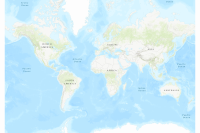

False


In [931]:
item = gis.content.get("7c81f2c1a15a4187b3538257dc76a7ed")
new_items = gis.content.clone_items([item])
new_item = new_items[0]
display(new_item)
print(item.url == new_item.url)

### Update an item's information


The code below uses the [`update` method of an `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.update) to change the title, tags, and description of that item. The documentation describes all the item properties you can update with this method.

In [935]:
item = gis.content.get("3afbcf22977b4012bac0a1a469b902c0")

new_props = {
    "title": "New Title",
    "tags": ["NewTag1", "NewTag2"],
    "description": "This item has new properties"
}

print(item.title)
print(item.tags)
print(item.description)

item.update(new_props)

print(item.title)
print(item.tags)
print(item.description)

Copied Feature Layer
['SPPS']
None
New Title
['NewTag1', 'NewTag2']
This item has new properties


### Update multiple items' information


The code below uses the [`bulk_update` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.bulk_update) to change multiple items' `categories` property at once.

In [940]:
itemids = [
    "3afbcf22977b4012bac0a1a469b902c0", 
    "8713161bf7494c20804d1de84b64ead0", 
    "7735e1e8054e4bb0a8289294a7b927dc"
]

new_props = {
    "categories": ["Education", "Tutorial"]
}

gis.content.bulk_update(itemids, new_props)

[{'results': [{'itemId': '7735e1e8054e4bb0a8289294a7b927dc', 'success': True},
   {'itemId': '3afbcf22977b4012bac0a1a469b902c0', 'success': True},
   {'itemId': '8713161bf7494c20804d1de84b64ead0', 'success': True}]}]

The `bulk_update` method only works with the `categories` property. For that reason, to make changes to other properties, the code below loops through several items and uses the `update` method to update each of them individually

In [941]:
itemids = [
    "3afbcf22977b4012bac0a1a469b902c0", 
    "8713161bf7494c20804d1de84b64ead0", 
    "7735e1e8054e4bb0a8289294a7b927dc"
]

# Update attribution and terms of use
new_props = {
    "accessInformation": "Travis Ormsby",
    "licenseInfo": "For educational use only"
}

for itemid in itemids:
    item = gis.content.get(itemid)
    item.update(new_props)

### Reassign an item to a new owner


The code below uses the [`reassign_to` method of the `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.reassign_to) to assign ownership based on the username of the new owner.

In [709]:
item = gis.content.get("d5cd41b03bac446dbfdaabc0c87b986f")
item.reassign_to(target_owner="t.ormsby")

True

Instead of a username string, the code below uses a [`User` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#user) created with the [`get` method of the `UserManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.get) to specify the new owner.

In [712]:
item = gis.content.get("d5cd41b03bac446dbfdaabc0c87b986f")
new_owner = gis.users.get("6626b8616d794725978b22fafdbdcc44")
item.reassign_to(target_owner=new_owner)

True

The code below attempts to reassign ownership to a user who is not able to own content. The code throws an exception and does not change the item ownership.

In [708]:
item = gis.content.get("d5cd41b03bac446dbfdaabc0c87b986f")
item.reassign_to(target_owner="ormsby_guest2")

Exception: Unable to reassign item. Target user does not have privileges to own items.
(Error Code: 400)

### Reassign multiple items to single new owner

The only method to bulk reassign ownership of content items is to transfer ownership of all a user's items using the [`reassign_to` method on the `User` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.User.reassign_to).

For that reason, the code below uses a loop to reassign multiple content items to a new owner.

In [733]:
item_ids = ["d5cd41b03bac446dbfdaabc0c87b986f", "18390402eade43f8bdbcaebe0c3f044b"]
new_owner = gis.users.get("15f6e33de2ce408483673fad4dbff612")

for item_id in item_ids:
    item = gis.content.get(item_id)
    reassign_status = item.reassign_to(new_owner)
    print(f"{item_id}: {reassign_status}")

d5cd41b03bac446dbfdaabc0c87b986f: True
18390402eade43f8bdbcaebe0c3f044b: True


### Share a single item


To change the sharing of an item, you need to use the `Item` object's [share](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.share) and [unshare](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.unshare) methods.

#### Change the sharing level

 The `share` method has an `everyone` and `org` parameter to set the sharing level. Be aware that the default values of these parameters represent the most restrictive public and organization sharing options. 
 
 The code below specifies that the item should not be shared with everyone, but does not specify how it should be shared with the organization. The changes in the `Item`'s `shared_with` property shows how the default parameter values mean that the item is now unshared from the organization as well.

In [678]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
print(item.shared_with)

item.share(everyone=False)
print(item.shared_with)

{'everyone': True, 'org': True, 'groups': []}
{'everyone': False, 'org': False, 'groups': []}


For that reason, the code below specifies a value for both the `everyone` and `org` parameters. This is a best practice when using the `share` method.

In [635]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
item.share(everyone=False, org=True)
print(item.shared_with)

{'everyone': False, 'org': True, 'groups': []}


Sharing with everyone is inclusive of sharing with the organization. The code below demonstrates that it is not possible to set sharing with everyone to `True` and the sharing with the org to `False`.

In [699]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
item.share(everyone=True, org=False)
print(item.shared_with)

{'everyone': True, 'org': True, 'groups': []}


#### Sharing items to groups: as documented

The API reference for the `share` method says to pass a list of groups to the `groups` parameter to share the item with those groups. 

The code below does that by passing a list of [`Group` objects](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#group) created by the [`get` method of the `GroupManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.GroupManager.get) to the `groups` parameter.

The `share` method returns a dictionary indicating any groups the item could not be shared with. In this case, the item could be shared with both groups, so the `notSharedWith` value is an empty list, and the two groups are indicated in the `groups` value in the separate dictionary returned by the item's `shared_with` property.

In [679]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
group1 = gis.groups.get("435bfd95c37b404ebbf9308b38dcd251")
group2 = gis.groups.get("d34a7555514b4a58a6a0f4c9c0ce4078")

share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[group1, group2]
)

print(share_result)
print(item.shared_with)

{'notSharedWith': [], 'itemId': '86f92739855e481c82d54c6dc167ef99'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Group2" owner:t.ormsby>]}


The code below uses the [`unshare` method of the `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.unshare) to remove the item from one of the groups it is shared with. 

In [680]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
group2 = gis.groups.get("d34a7555514b4a58a6a0f4c9c0ce4078")

item.unshare(groups=[group2])

print(item.shared_with)

{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>]}


#### Sharing items to groups: the undocumented complexity

There are several complexities for sharing with groups that are not immediately obvious. The next several examples walk through pitfalls you might encounter when sharing with a group. None of these behaviors are documented in the API reference, though some of them are documented in the [REST API reference for the shareitems endpoint](https://developers.arcgis.com/rest/users-groups-and-items/share-items.htm). 

The code below is identical to the first group sharing code above. But the return value of the `share` method now seems to suggest the item was not shared with the first group. That's not true, as the `shared_with` property confirms the item is shared with both groups. The confusing `notSharedWith` value occured because in this example, the item was already shared with the first group. 

The best way to interpret the `notSharedWith` value is "the sharing was not changed to add these groups to the existing groups the item is already shared with". This value does not mean "this item is not shared with these groups".

For this reason, it is not a good idea to rely on the `notSharedWith` list to determine if an item is shared with a group or not. Use the `shared_with` property instead.

In [681]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")
group1 = gis.groups.get("435bfd95c37b404ebbf9308b38dcd251")
group2 = gis.groups.get("d34a7555514b4a58a6a0f4c9c0ce4078")

share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[group1, group2]
)

print(share_result)
print(item.shared_with)

{'notSharedWith': ['435bfd95c37b404ebbf9308b38dcd251'], 'itemId': '86f92739855e481c82d54c6dc167ef99'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Group2" owner:t.ormsby>]}


The code below is similar to the code above, except that it passes a list of group id strings to the `groups` parameter instead of a list of `Group` objects. The result is similar, except now both groups also appear in the `notSharedWith` list because the item is already shared with both groups. 

The `notSharedWith` list now also includes a additional empty string. This superflous empty string appears in this list whenever you pass a list of group id strings to the `groups` parameter. For that reason, it is a best practice to use `Group` objects instead

In [682]:
item = gis.content.get("86f92739855e481c82d54c6dc167ef99")

share_result = item.share(
    everyone=False, 
    org=True, 
    groups=["435bfd95c37b404ebbf9308b38dcd251", "d34a7555514b4a58a6a0f4c9c0ce4078"]
)

print(share_result)
print(item.shared_with)

{'notSharedWith': ['', '435bfd95c37b404ebbf9308b38dcd251', 'd34a7555514b4a58a6a0f4c9c0ce4078'], 'itemId': '86f92739855e481c82d54c6dc167ef99'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Group2" owner:t.ormsby>]}


The code below attempts to share a different item, with a different owner, to the same two groups used above. This item's owner is a member of both groups, but is only allowed to contribute content to the first group. The `share` method returns a response indicating that the content was not shared to the second group. The `shared_with` property confirms that the item is shared only with the first group.


In [684]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
group1 = gis.groups.get("435bfd95c37b404ebbf9308b38dcd251")
group2 = gis.groups.get("d34a7555514b4a58a6a0f4c9c0ce4078")

share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[group1, group2]
)
print(share_result)
print(item.shared_with)

{'notSharedWith': ['d34a7555514b4a58a6a0f4c9c0ce4078'], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>]}


The code below attempts to share the same item as above to a shared update group. The item owner is a member of this group and has permission to contribute content to the group, but the item is not successfully shared.

In [685]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
sharedUpdateGroup = gis.groups.get("65959444535f4bbb84dbb740a1fc4f37")
share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[sharedUpdateGroup]
)
print(share_result)
print(item.shared_with)

{'notSharedWith': ['65959444535f4bbb84dbb740a1fc4f37'], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>]}


When sharing to a shared update group, you must explicitly enable group members to edit the item. For that reason, the code below sets the `allow_members_to_edit` parameter of the `share` method to `True`, allowing the item to be successfully shared.

In [686]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
sharedUpdateGroup = gis.groups.get("65959444535f4bbb84dbb740a1fc4f37")
share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[sharedUpdateGroup],
    allow_members_to_edit=True
)
print(share_result)
print(item.shared_with)

{'notSharedWith': [], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Shared Update" owner:t.ormsby>]}


The code below shares the same item as above with a group that the item owner is not a member of. This code works because the item is shared to the organization and the user associated with the `gis` object is the owner of the group the item is being shared to. Group owners or managers can add organization-shared content to their group, even if the item owner is not a group member. 

Notice also that even though only a single group is specified in the `groups` parameter, the `shared_with` property indicates the item is shared with two groups. Groups passed to the `groups` parameter are added to the groups the item is shared to, they do not replace those groups. There is no way to use the `share` method to unshare an item from a group.

In [687]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
adminGroup = gis.groups.get("ecc2dd125703488d8d2c1d1bc2e14380")
share_result = item.share(
    everyone=False, 
    org=True, 
    groups=[adminGroup]
)
print(share_result)
print(item.shared_with)

{'notSharedWith': [], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': True, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Shared Update" owner:t.ormsby>, <Group title:"AdminsOnly" owner:t.ormsby>]}


The code below changes the sharing of the item above so that it is not shared with the organization any longer. If performed in the portal web app, this operation would have automatically unshared the item from any groups the item owner cannot contribute content to and succesfully updated the organization sharing level.

But the Python API throws an error wrongly indicating the admin user associated with the `gis` object does not have permission to change sharing.

In [688]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
share_result = item.share(
    everyone=False, 
    org=False
)
print(share_result)
print(item.shared_with)

Exception: User does not own the item or have the privileges to share this item.

The code below attempts to change the orgnization setting by using the `unshare` method to remove the item from the group the item owner does not have permission to contribute to, then changing the organization sharing level with the `share` method. This does not work either

In [689]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
adminGroup = gis.groups.get("ecc2dd125703488d8d2c1d1bc2e14380")
item.unshare([adminGroup])

share_result = item.share(
    everyone=False, 
    org=False,
    groups=None
)
print(share_result)
print(item.shared_with)

Exception: User does not own the item or have the privileges to share this item.

For this reason, the code below temporarily reassigns ownership of the item in order to correctly change the organization sharing level.

In [690]:
item = gis.content.get("c01140f5fb4b492eb1e9b3c9d69bead7")
origOwner = item.owner
item.reassign_to(gis.users.me)

adminGroup = gis.groups.get("ecc2dd125703488d8d2c1d1bc2e14380")
item.unshare([adminGroup])

share_result = item.share(
    everyone=False, 
    org=False,
    groups=None
)

item.reassign_to(origOwner)

print(share_result)
print(item.shared_with)

{'notSharedWith': [], 'itemId': 'c01140f5fb4b492eb1e9b3c9d69bead7'}
{'everyone': False, 'org': False, 'groups': [<Group title:"Group1" owner:t.ormsby>, <Group title:"Shared Update" owner:t.ormsby>]}


### Share multiple items

The code below uses the [`share_items` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.share_items) to change the sharing of multiple items. The `share_items` method works just like the `share` method of an `Item` object, with the same potential challenges noted above.

In [946]:
itemids = [
    "3afbcf22977b4012bac0a1a469b902c0", 
    "8713161bf7494c20804d1de84b64ead0", 
    "7735e1e8054e4bb0a8289294a7b927dc"
]

group = gis.groups.get("435bfd95c37b404ebbf9308b38dcd251")

gis.content.share_items(itemids, everyone=False, org=False, groups=[group])

{'results': [{'itemId': '7735e1e8054e4bb0a8289294a7b927dc',
   'success': True,
   'notSharedWith': []},
  {'itemId': '3afbcf22977b4012bac0a1a469b902c0',
   'success': True,
   'notSharedWith': []},
  {'itemId': '8713161bf7494c20804d1de84b64ead0',
   'success': True,
   'notSharedWith': []}]}

The code below uses the [`unshare_items` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.unshare_items) to remove sharing of a set of items from a particular group.

It is possible to use the `unshare_items` method to change the sharing level for everyone and/or the organization, but it only does so when explicitly specified. That is different from the default behavior of the `share_items` method, which will default to removing public and org sharing if not specified. It is also different from the `unshare` method of the `Item` object, which is not capable of changing the sharing level at all, and only affects sharing to groups.

In [947]:
itemids = [
    "3afbcf22977b4012bac0a1a469b902c0", 
    "8713161bf7494c20804d1de84b64ead0", 
    "7735e1e8054e4bb0a8289294a7b927dc"
]

group = gis.groups.get("435bfd95c37b404ebbf9308b38dcd251")

gis.content.unshare_items(itemids, everyone=True, org=True, groups=[group])

{'results': [{'itemId': '7735e1e8054e4bb0a8289294a7b927dc',
   'success': True,
   'notUnsharedFrom': []},
  {'itemId': '3afbcf22977b4012bac0a1a469b902c0',
   'success': True,
   'notUnsharedFrom': []},
  {'itemId': '8713161bf7494c20804d1de84b64ead0',
   'success': True,
   'notUnsharedFrom': []}]}

### Change folder locations

When changing an item's location, you may want to know that item's current location. The code below finds a folder id given an item by using the `ownerFolder` property of the `Item` object.

In [959]:
item = gis.content.get("7735e1e8054e4bb0a8289294a7b927dc")
print(item.ownerFolder)

5ed2695821a54ffb898cc6bfc9c1466a


The code below takes the opposite approach and lists all the items in a given folder id by using the [`items` method of a `User` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.User.items)

In [964]:
user = gis.users.get("15f6e33de2ce408483673fad4dbff612")
items = user.items(folder="5ed2695821a54ffb898cc6bfc9c1466a")
for item in items:
    print(item)

<Item title:"Copied Hosted Feature Layer" type:Feature Layer Collection owner:t.ormsby>


The code below moves an item to a different folder using the [`move` method of an `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.move).

In [965]:
item = gis.content.get("7735e1e8054e4bb0a8289294a7b927dc")
print(item.ownerFolder)

item.move("88bc290b78de4cfc8f2d09449bc8a766")
print(item.ownerFolder)

5ed2695821a54ffb898cc6bfc9c1466a
88bc290b78de4cfc8f2d09449bc8a766


The code below moves an item to a new folder using the [`create_folder` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.create_folder) and the `move` method of an `Item` object.

In [967]:
user = gis.users.get("15f6e33de2ce408483673fad4dbff612")
item = gis.content.get("7735e1e8054e4bb0a8289294a7b927dc")
print(item.ownerFolder)

new_folder = gis.content.create_folder(folder="New Folder", owner=user)
item.move(new_folder)
print(item.ownerFolder)

88bc290b78de4cfc8f2d09449bc8a766
6b79edeb5261461e9c52f4416523cd8a


### Export an item


The code below exports a hosted feature layer as a shapefile using the [`export` method of the `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.export). In addition to shapefile, the documentation describes other valid export formats.

This method creates a shapefile item in the portal and returns `Item` object for that shapefile. The code below downloads that shapefile as a .zip archive using the [`download` method of that new `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.download). The `save_path` parameter indicates the local path the downloaded file should be saved to. In this case, the value `"."` means the file should be downloaded to the current working directory.



In [980]:
item = gis.content.get("8713161bf7494c20804d1de84b64ead0")
item_export = item.export(title="for_download", export_format="Shapefile")
item_export.download(save_path=".")


'./for_download.zip'

### Delete an item

The code below uses the [`delete` method of an item object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.delete) to delete that item.

In [982]:
item = gis.content.get("7735e1e8054e4bb0a8289294a7b927dc")
item.delete()

True

The `delete` method will not return `False` if it fails to delete the item. Instead it will throw an exception. For that reason, you may want to check if the item can be deleted before attempting to delete it. The code below uses the `dry_run` parameter to check if the item can be deleted

In [984]:
item = gis.content.get("d7783691894445a39395bad895cf4735")
item.delete(dry_run=True)

{'can_delete': False,
 'details': {'code': 400,
  'message': 'Unable to delete item d7783691894445a39395bad895cf4735. Delete protection is turned on.',
  'offending_items': []}}

The code below uses the [`can_delete` property of the `Item` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.can_delete) to check if the item can be deleted. While the `can_delete` method prints a dictionary to stdout, the return value of the method is a Boolean.

In [988]:
item = gis.content.get("d7783691894445a39395bad895cf4735")
item.can_delete


{'code': 400, 'messageCode': 'CONT_0048', 'message': 'Unable to delete item d7783691894445a39395bad895cf4735. Delete protection is turned on.', 'offendingItems': []}


False

### Delete multiple items

The code below deletes a set of items by using the [`delete_items` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.delete_items). This method has the limitation that all items must belong to the same user.


In [990]:
itemids = [
    "d7783691894445a39395bad895cf4735",
    "3afbcf22977b4012bac0a1a469b902c0"
]

gis.content.delete_items(itemids)

[True]

The code below deletes a folder using the [`delete_folder` method of the `ContentManager` object](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.delete_folder). Deleting the folder has the effect of deleting all items in the folder.

In [991]:
gis.content.delete_folder(folder="6b79edeb5261461e9c52f4416523cd8a")

True

For items owned by multiple different users, it is not possible to bulk delete them in a single operation. For that reason, the code below loops through a list of items to delete them.

In [994]:
itemids = [
    "57ee9c068f4442e8a95d2f2f087d8dcf",
    "0adaa9278522454e9a939ac9772ba899"
]

for itemid in itemids:
    item = gis.content.get(itemid)
    item.delete()